# Testing

In [1]:
from complex_cell_model import ComplexCellModel, gabor_fn
from Model import LeNet

import numpy as np
import matplotlib.pyplot as plt
import torch

## Initialize the complex cell model and import the CNN model

In [6]:
sigma = 4
Lambda = 10
complexcell = ComplexCellModel(sigma=sigma, Lambda=Lambda, theta=0.5*np.pi)
net = np.load('results/net.npy', allow_pickle=True).item()

## Orientation tuning

### Generate Gabor patches at different orientations

In [4]:
background = np.zeros((144,256))

test_rotation = []
gabor_rotation = []
for i in np.linspace(0,np.pi,180):
    gabor = gabor_fn(sigma=sigma, theta=i, Lambda=Lambda, psi=0, gamma=1)
    x = gabor.shape[0]
    test_image = background.copy()
    test_image[144//2-x//2:144//2+x//2+1, 256//2-x//2:256//2+x//2+1] = gabor
    test_image = (test_image - test_image.min())/(test_image.max() - test_image.min())
    test_rotation += [test_image]
    gabor_rotation += [gabor]

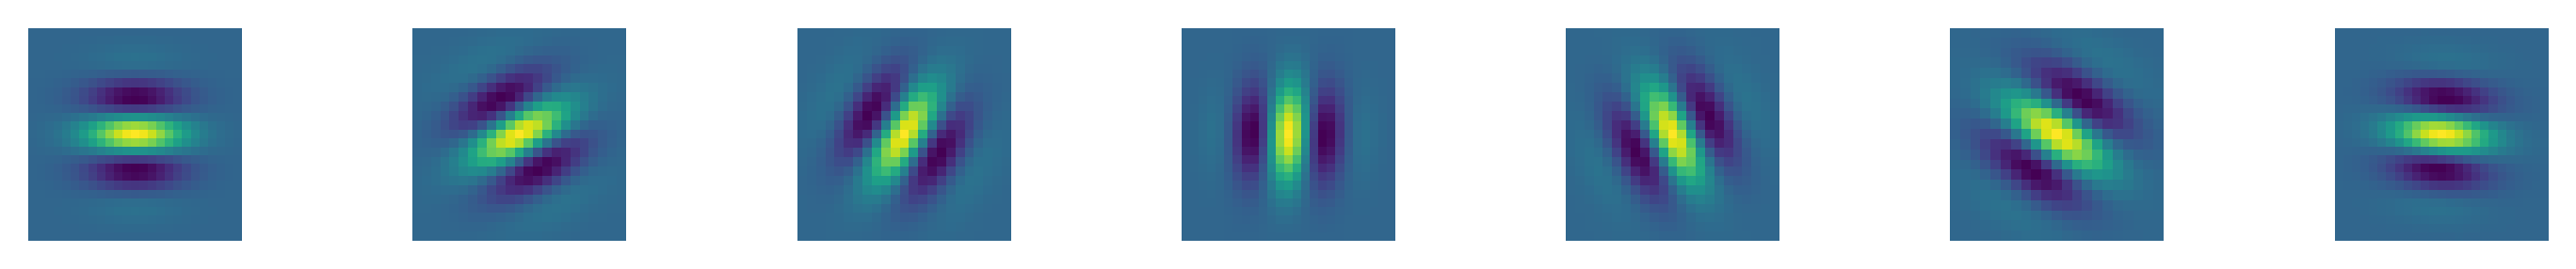

In [437]:
fig, axes = plt.subplots(1,7,figsize=(12,1),dpi=300)
for ax, im in zip(axes, gabor_rotation[::29]):
    ax.imshow(im)
    ax.axis('off')

### Orientation tuning of the complex cell model

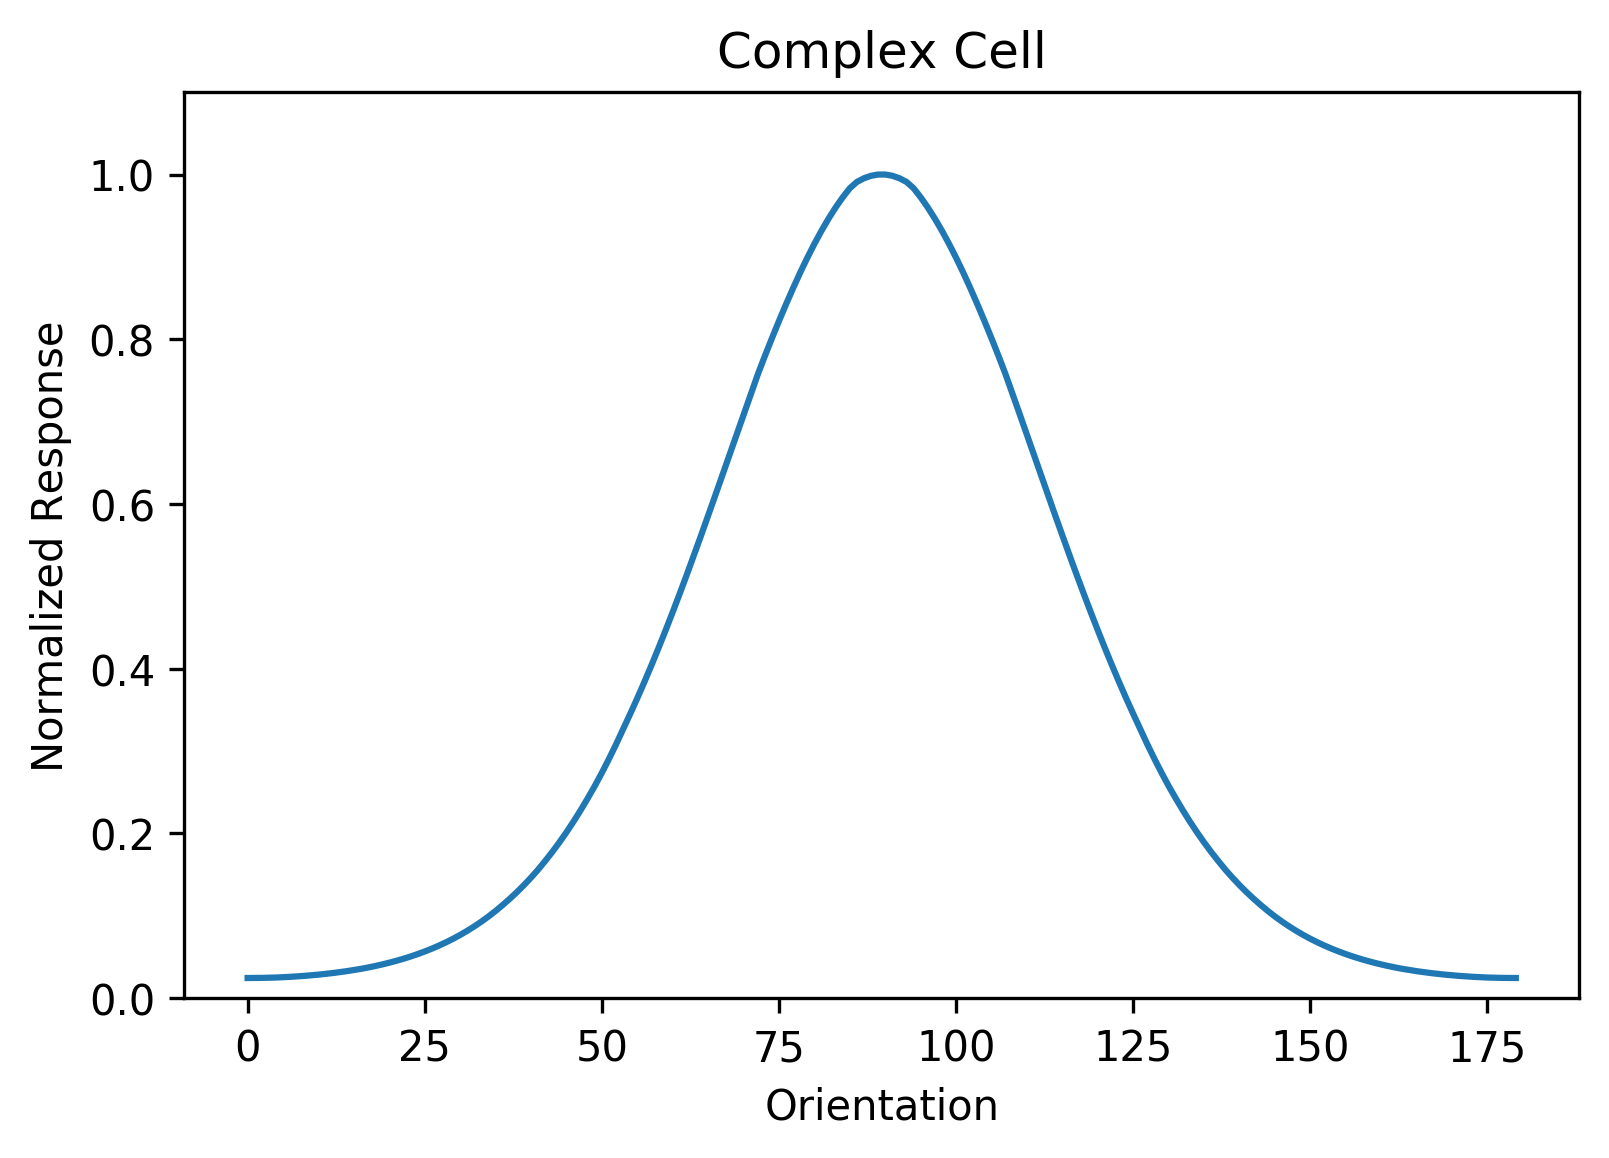

In [14]:
responses_rotation = []

for i in test_rotation:
    response = complexcell(torch.tensor(i,dtype=torch.float)[None,None,:,:])[0][:,:,144//2-x//2,256//2-x//2].cpu().detach().numpy().squeeze()
    responses_rotation.append(response)
    
scale_cc = max(responses_rotation)
responses_rotation_norm = responses_rotation/scale_cc

plt.figure(dpi=300)
plt.plot(responses_rotation_norm)
plt.ylim(0,1.1)
plt.title('Complex Cell')
plt.ylabel('Normalized Response')
plt.xlabel('Orientation')
plt.plot(responses_rotation)

### Orientation tuning of the CNN model

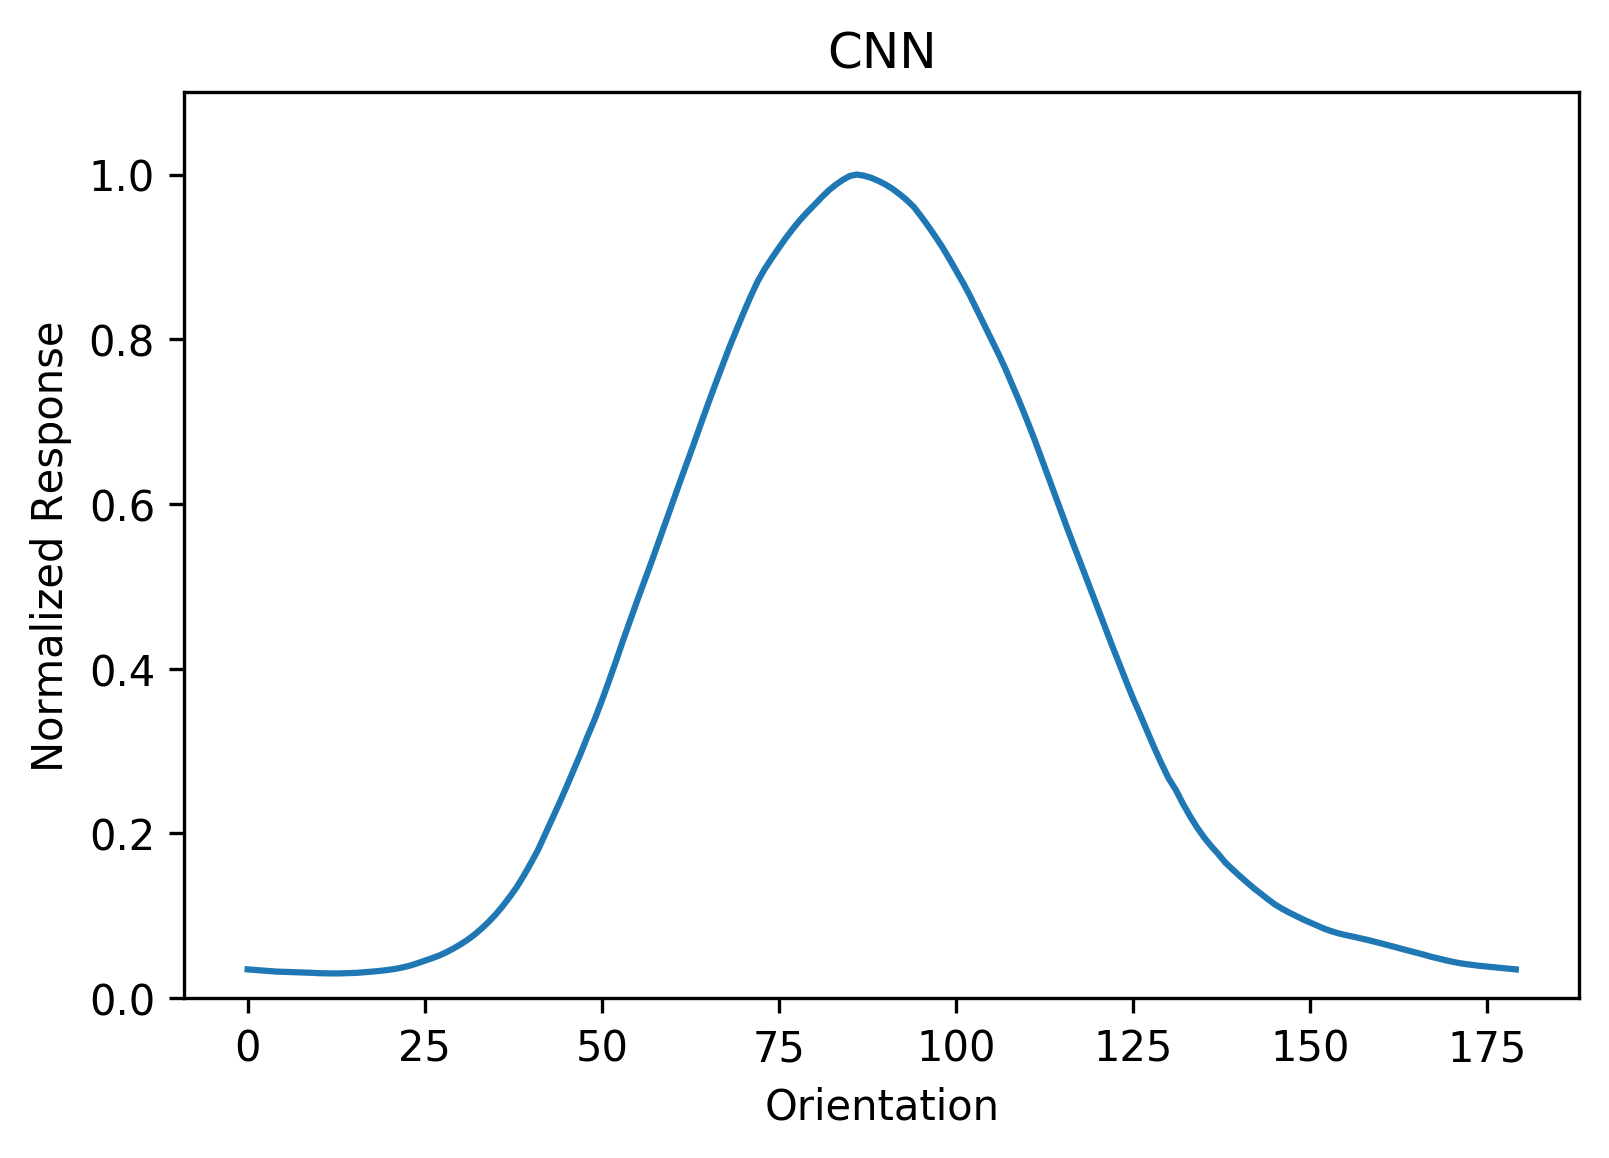

In [9]:
responses_rotation_CNN = []

for i in test_rotation:
    response = net(torch.tensor(i,dtype=torch.float,device='cuda')[None,None,:,:]).cpu().detach().numpy().squeeze()
    responses_rotation_CNN.append(response)

scale_nn = max(responses_rotation_CNN)
responses_rotation_norm_CNN = responses_rotation_CNN/scale_nn

plt.figure(dpi=300)
plt.plot(responses_rotation_norm_CNN)
plt.ylim(0,1.1)
plt.title('CNN')
plt.ylabel('Normalized Response')
plt.xlabel('Orientation')
plt.plot(responses_rotation)

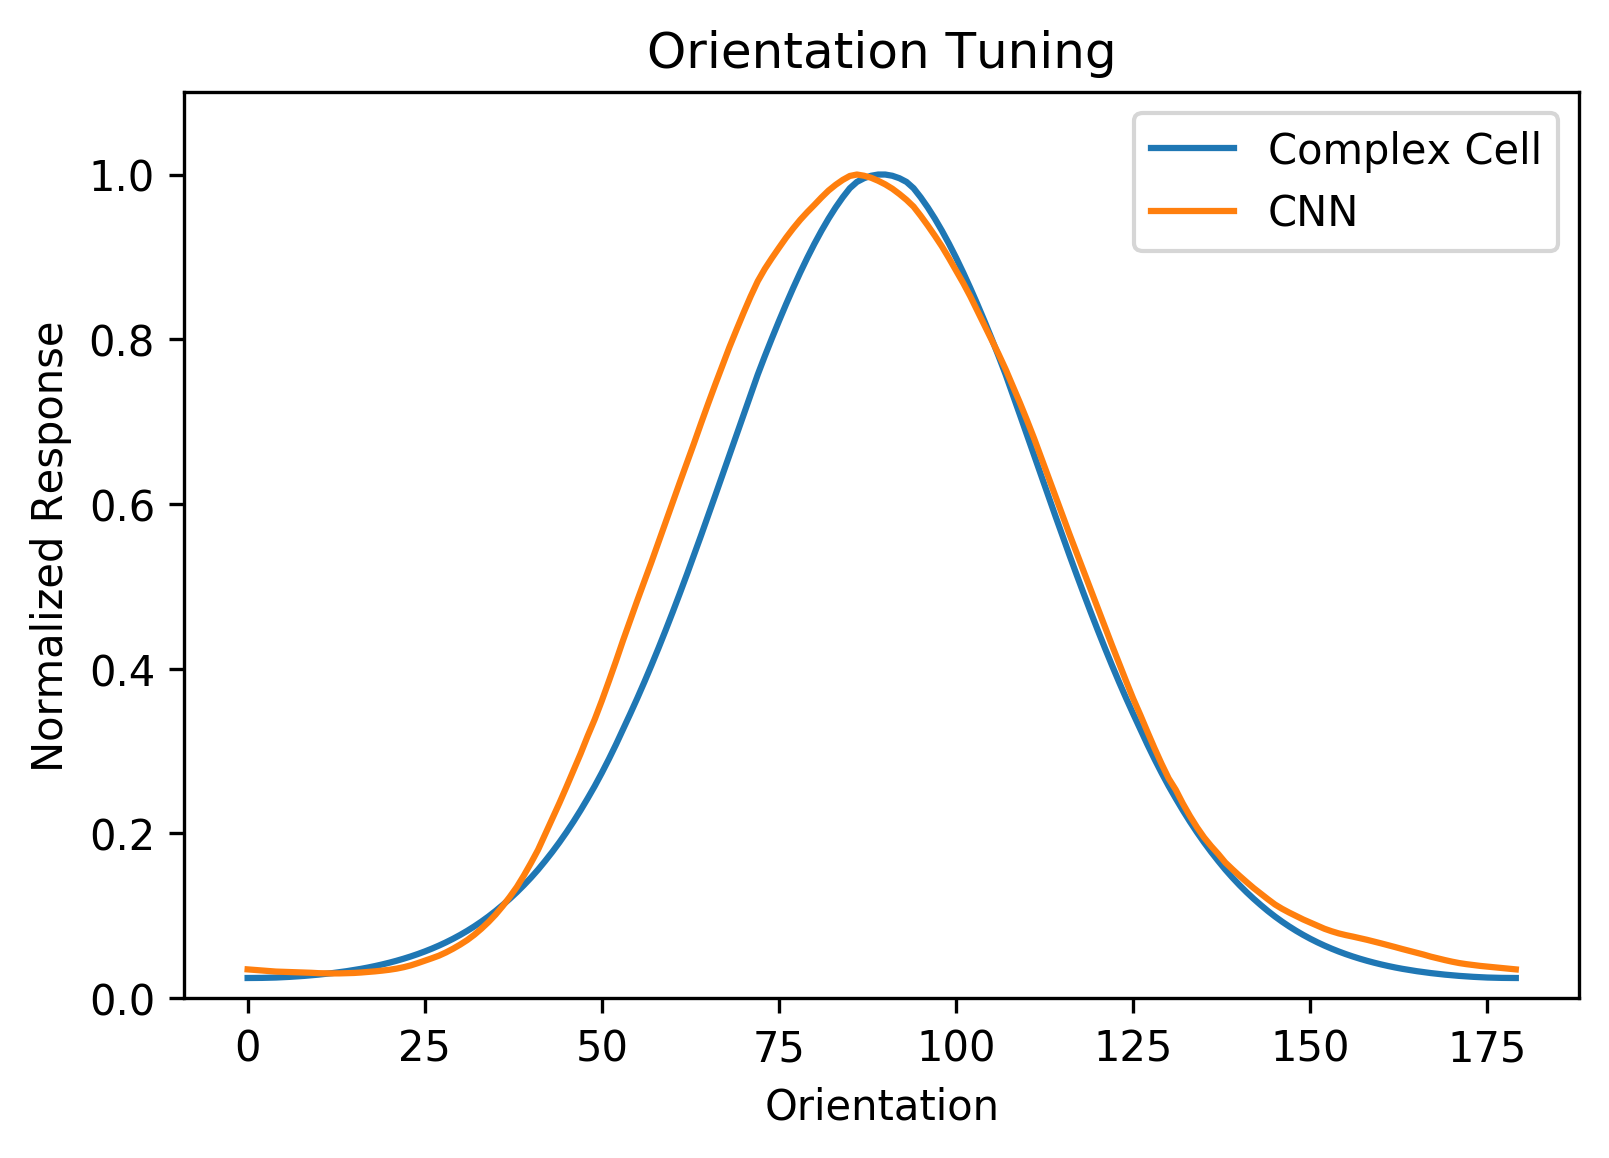

In [10]:
plt.figure(dpi=300)
plt.plot(responses_rotation_norm, label='Complex Cell')
plt.plot(responses_rotation_norm_CNN, label='CNN')
plt.ylim(0,1.1)
plt.title('Orientation Tuning')
plt.ylabel('Normalized Response')
plt.xlabel('Orientation')
plt.legend()

## Phase Tuning
### Generate Gabor patches at different phases

In [11]:
background = np.zeros((144,256))

test_phase = []
gabor_phase = []
for i in np.linspace(0,np.pi * 2,360):
    gabor = gabor_fn(sigma=sigma, theta=np.pi/2, Lambda=Lambda, psi=i, gamma=1)
    gabor = (gabor+1)/2
    x = gabor.shape[0]
    test_image = background.copy()
    test_image[144//2-x//2:144//2+x//2+1, 256//2-x//2:256//2+x//2+1] = gabor
    test_image = (test_image - test_image.min())/(test_image.max() - test_image.min())
    test_phase += [test_image]
    gabor_phase += [gabor]

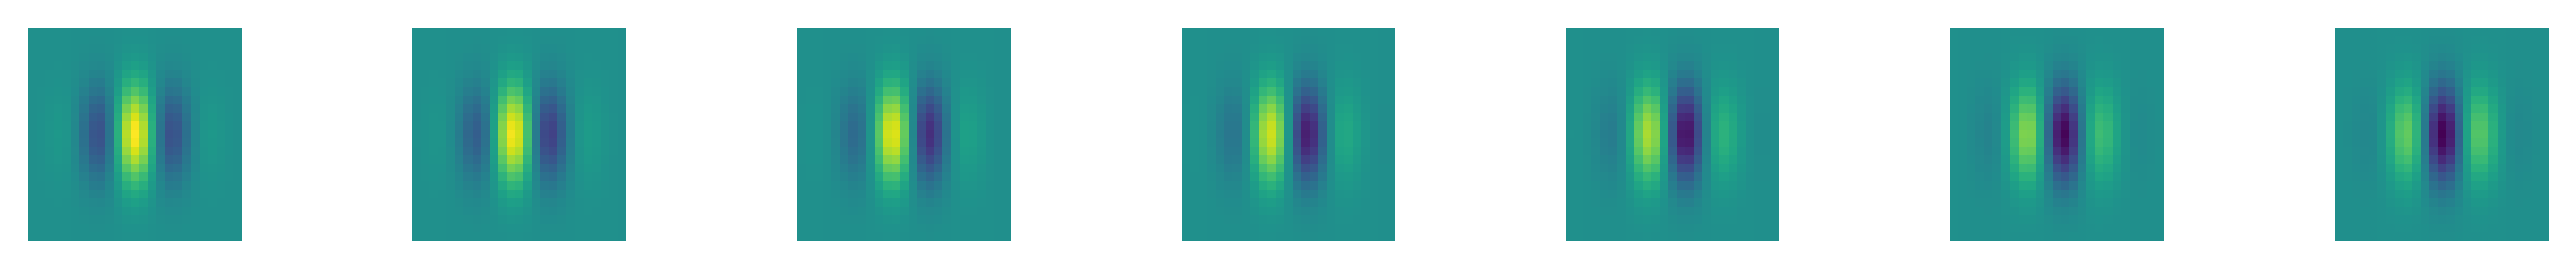

In [12]:
fig, axes = plt.subplots(1,7,figsize=(12,1),dpi=300)
for ax, im in zip(axes, gabor_phase[::29]):
    ax.imshow(im, vmin=0, vmax=1)
    ax.axis('off')

### Phase Invariance of the complex cell model

Text(0.5, 0, 'Phase')

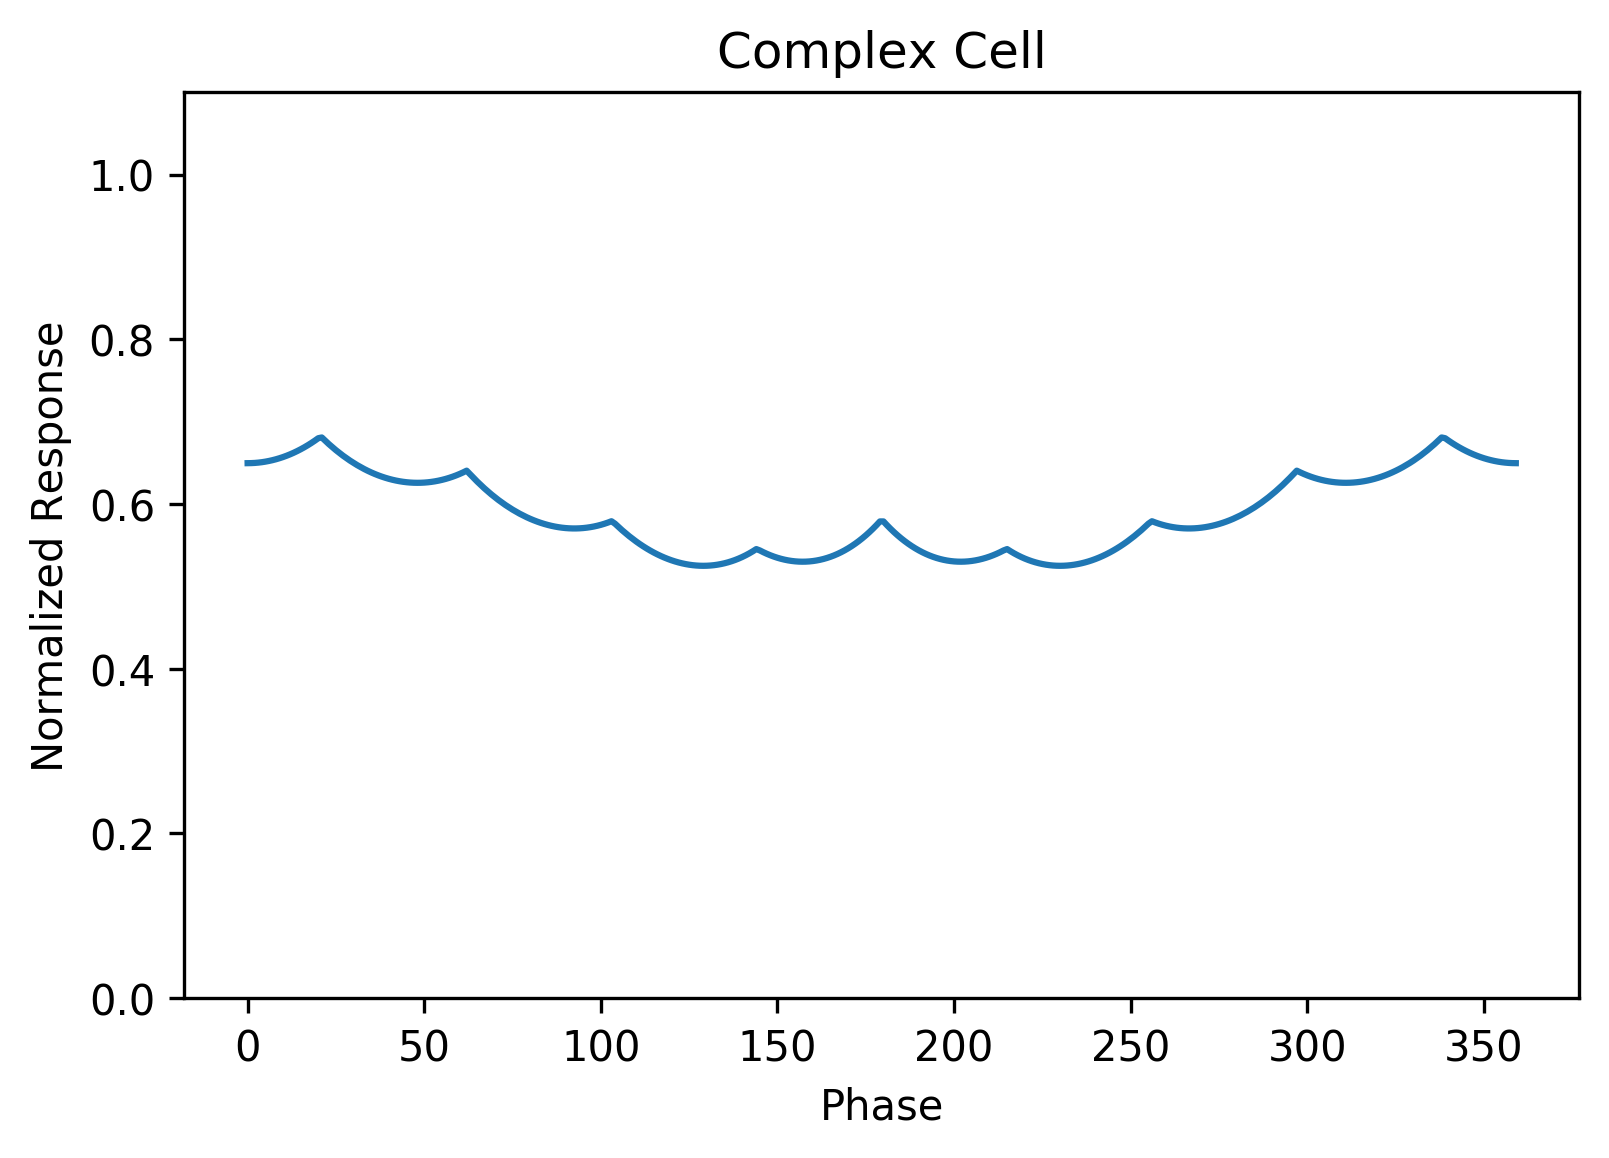

In [15]:
responses_phase = []

for i in test_phase:
    response = complexcell(torch.tensor(i,dtype=torch.float)[None,None,:,:])[0][:,:,144//2-x//2,256//2-x//2].cpu().detach().numpy().squeeze()
    responses_phase.append(response)
    
responses_phase_norm = responses_phase/scale_cc
    
plt.figure(dpi=300)
plt.plot(responses_phase_norm, label='phase')
plt.ylim(0,1.1)
plt.title('Complex Cell')
plt.ylabel('Normalized Response')
plt.xlabel('Phase')

### Phase Invariance of the CNN model

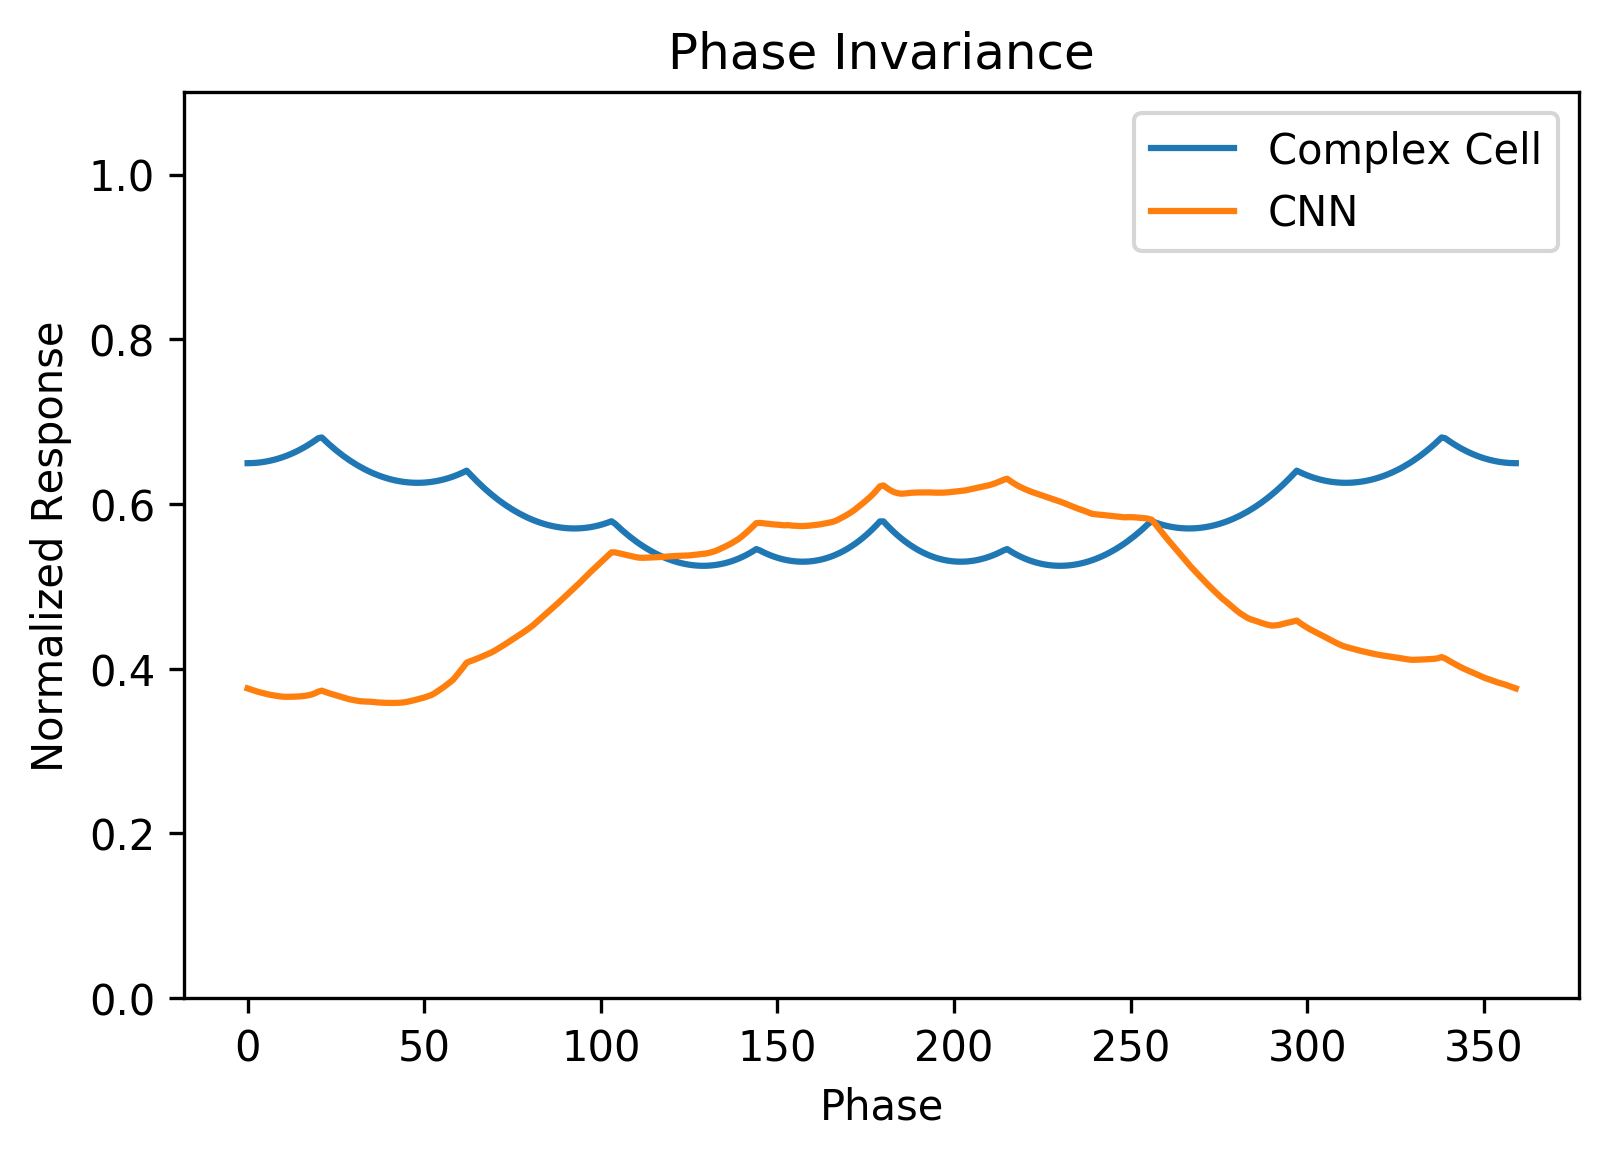

In [16]:
responses_phase_CNN = []

for i in test_phase:
    response = net(torch.tensor(i,dtype=torch.float,device='cuda')[None,None,:,:]).cpu().detach().numpy().squeeze()
    responses_phase_CNN.append(response)

responses_phase_norm_CNN = responses_phase_CNN/scale_nn

plt.figure(dpi=300)
plt.plot(responses_phase_norm, label='Complex Cell')
plt.plot(responses_phase_norm_CNN, label='CNN')
plt.ylim(0,1.1)
plt.title('Phase Invariance')
plt.ylabel('Normalized Response')
plt.xlabel('Phase')
plt.legend()